# Projet_Evaluation_Pro-BTP - 2

## Ce projet consiste à réaliser les tâches sur le jeu de données Open data de la SNCF téléchargeable à l'adresse suivante :

https://data.iledefrance-mobilites.fr/explore/dataset/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-sem/table/

## Dans ce notebook, nous allons : 



1.   Présenter une classification des arrêts en vous basant sur le nombre de validations par catégorie de titre




In [1]:
### Import librairie
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset
data = pd.read_csv('/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-sem.csv' , encoding = "ISO-8859-1" , sep = ";")
data.dropna(axis = 0, inplace = True)

## Transforme le type de "JOUR" as datetime
data['JOUR'] = pd.to_datetime(data['JOUR'], infer_datetime_format = True)
data['CATEGORIE_TITRE'].replace(['?'], 'TITRE INCONNU', inplace=True)

## Suppression des données manquentes
data.dropna(axis = 0, inplace = True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data['NB_VALD'].replace(['Moins de 5'], '4', inplace=True)

data['NB_VALD'] = data['NB_VALD'].astype(int)

In [3]:
data = data.drop(['JOUR', 'CODE_STIF_TRNS','CODE_STIF_RES','CODE_STIF_ARRET','ID_REFA_LDA'], axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430849 entries, 0 to 436348
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   LIBELLE_ARRET    430849 non-null  object
 1   CATEGORIE_TITRE  430849 non-null  object
 2   NB_VALD          430849 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 13.1+ MB


In [5]:
data = data [["NB_VALD","CATEGORIE_TITRE","LIBELLE_ARRET"]]

In [6]:
# On recode toutes les variables, sauf la cible "groupe"
#Libelle_arret_Dummy = pd.get_dummies(data['LIBELLE_ARRET'])
CATEGORIE_TITRE_Dummy = pd.get_dummies(data['CATEGORIE_TITRE'])


data_Bis = pd.concat((data,CATEGORIE_TITRE_Dummy), axis =1)
data_Bis = data_Bis.drop(['CATEGORIE_TITRE'],axis = 1)


In [7]:
df = pd.DataFrame(data_Bis)

cols = list(df)
cols[1], cols[10] = cols[10], cols[1]
#cols
df = df[cols]


df

,NB_VALD,TST,AMETHYSTE,AUTRE TITRE,FGT,IMAGINE R,NAVIGO,NAVIGO JOUR,NON DEFINI,TITRE INCONNU,LIBELLE_ARRET
0,5,0,0,1,0,0,0,0,0,0,PLAISIR-GRIGNON
1,953,0,0,0,0,0,1,0,0,0,PLAISIR-LES-CLAYES
2,111,0,0,0,0,0,0,0,0,1,RAMBOUILLET
3,1552,0,0,0,0,1,0,0,0,0,RAMBOUILLET
4,1145,0,0,0,0,0,1,0,0,0,SEVRES RIVE GAUCHE
...,...,...,...,...,...,...,...,...,...,...,...
436344,110,0,0,0,0,0,0,0,0,1,CRETEIL-P. LAC
436345,19319,0,0,0,0,0,1,0,0,0,ODEON
436346,4,0,1,0,0,0,0,0,0,0,GARANCIERES-LA QUEUE
436347,65,0,0,0,1,0,0,0,0,0,SULLY-MORLAND


In [8]:
from sklearn.model_selection import train_test_split
dfTrain, dfTest = train_test_split(df,test_size=0.2,random_state=42,stratify=df.LIBELLE_ARRET)

In [9]:
#instanciation de l'arbrefrom sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
arbreFirst = DecisionTreeClassifier(max_depth = 3)

In [10]:
#construction de l'arbre
arbreFirst.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.LIBELLE_ARRET)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
impVarFirst={"Variable":df.columns[:-1],"Importance":arbreFirst.feature_importances_}
print(pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

        Variable  Importance
0        NB_VALD    0.521397
7    NAVIGO JOUR    0.246574
9  TITRE INCONNU    0.116484
5      IMAGINE R    0.115545
1            TST    0.000000
2      AMETHYSTE    0.000000
3    AUTRE TITRE    0.000000
4            FGT    0.000000
6         NAVIGO    0.000000
8     NON DEFINI    0.000000


([<matplotlib.axis.YTick at 0x7fe2e96fe5f8>,
 [Text(0, 0, 'NB_VALD'),
  Text(0, 0, 'NAVIGO JOUR'),
  Text(0, 0, 'TITRE INCONNU'),
  Text(0, 0, 'IMAGINE R'),
  Text(0, 0, 'NON DEFINI'),
  Text(0, 0, 'NAVIGO'),
  Text(0, 0, 'FGT'),
  Text(0, 0, 'AUTRE TITRE'),
  Text(0, 0, 'AMETHYSTE'),
  Text(0, 0, 'TST')])

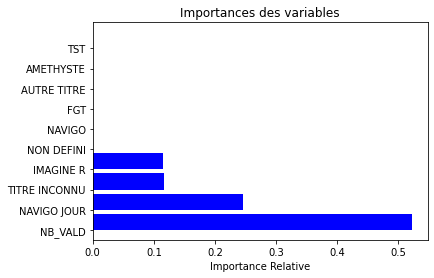

In [21]:
#importance par ordre
importances = arbreFirst.feature_importances_
indices = np.argsort(importances)[::-1]
indices=indices[0:20]  #représentation des 20 variables les plus importants
features = df.columns[0:64]
plt.figure(1)
plt.title('Importances des variables')
plt.barh(range(len(indices)), importances[indices], color='b', align='edge')
plt.xlabel('Importance Relative')
plt.yticks(range(len(indices)), features[indices])

In [13]:
#prédiction sur l'échantillon test
predFirst = arbreFirst.predict(X=dfTest.iloc[:,:-1])
#distribution des predictions
import numpy
print(numpy.unique(predFirst,return_counts=True))

(array(['CHATELET-LES HALLES', "GARE DE L'EST", 'JAVEL',
       'LA DEFENSE-GRANDE ARCHE', 'MASSY-VERRIERES', 'PORTE MAILLOT'],
      dtype=object), array([    8,   305, 22611, 35393, 19729,  8124]))


In [14]:
#taux de reconnaissance
from sklearn import metrics
print(metrics.accuracy_score(dfTest.LIBELLE_ARRET,predFirst))

0.006417546709991877


In [15]:
#taux d'erreur
print(1.0 -metrics.accuracy_score(dfTest.LIBELLE_ARRET,predFirst))

0.9935824532900082
